# Проект SQL

## Описание задания, цели и задачи исследования

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.
<br>Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. 
<br>**Цели исследования** — проанализировать базу данных для определения ценностного предложения для нового продукта.
<br>Исходя из цели были сформулированы задачи исследования:
- расчет количества книг, которые вышли после 1 января 2000 года,
- расчет количества обзоров и средней оценки для каждой книги,
- определение издательства, которое выпустило наибольшее число книг толще 50 страниц,
- определение автора с самой высокой средней оценкой книг, при учете книг с 50 и более оценками,
- расчет среднего количества обзоров от пользователей, которые поставили больше 50 оценок.

## Описание данных

Таблица **books** содержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

Таблица **authors** содержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

Таблица **publishers** содержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

Таблица **ratings** содержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

Таблица **reviews** содержит данные о пользовательских обзорах на книги:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

## Загрузка данных и подготовка их к анализу

### Импорт библиотек и настроек

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
db_config['pwd'],
db_config['host'],
db_config['port'],
db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

### Знакомство с данными

In [3]:
table = ['books', 'authors', 'publishers', 'ratings', 'reviews']
for i in table:
    query = '''
        SELECT *
        FROM {}
    '''.format(i)
    temp_df = pd.io.sql.read_sql(query, con = engine)
    temp_df.info()
    display(temp_df.head())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


### Схема данных

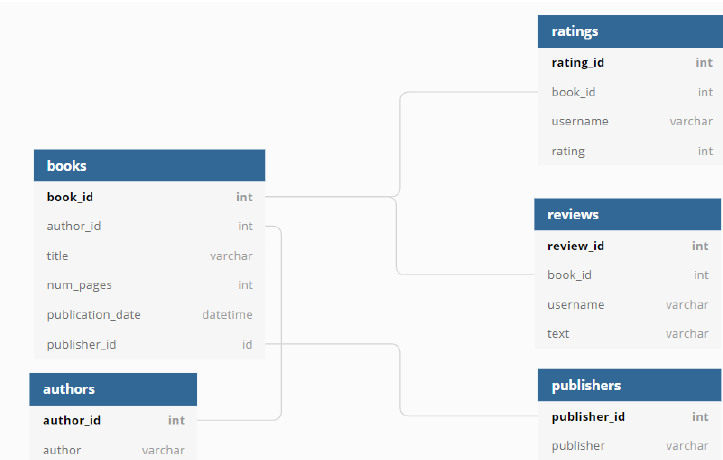

### Выводы по пункту 3

Исходные данные в таблицах корректные, пропусков нет, форматы столбцов соответствуют здравому смыслу, наименования столбцов в змеином регистре 

## Основные задания проекта

Запишем функцию для вывода результатов запроса

In [4]:
def select_query(q):
    display(pd.io.sql.read_sql(q, con = engine))

### Первый SQL-запрос

Посчитайте, сколько книг вышло после 1 января 2000 года

In [5]:
query_1 = '''
    SELECT COUNT(book_id) as count_book_after_2000
    FROM books
    WHERE publication_date >= '2000-01-02'
'''
select_query(query_1)

,count_book_after_2000
0,819


После 1 января 2000 года вышло 819 книг

### Второй SQL-запрос

Для каждой книги посчитайте количество обзоров и среднюю оценку

In [6]:
query_2 = '''
WITH book_r_r AS
(
    SELECT rat.book_id,
           COUNT(DISTINCT review_id) as count_review,
           round(avg(rat.rating),2) as avg_rating
    FROM reviews as rev
    INNER JOIN books as b ON rev.book_id = b.book_id
    INNER JOIN ratings as rat ON b.book_id = rat.book_id
    GROUP BY rat.book_id
    ORDER BY 2 DESC,
             3 DESC
)

SELECT title, 
       count_review,
       avg_rating
FROM book_r_r
JOIN books as b ON book_r_r.book_id = b.book_id
'''
select_query(query_2)

,title,count_review,avg_rating
0,Twilight (Twilight #1),7,3.66
1,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
2,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
3,The Book Thief,6,4.26
4,The Glass Castle,6,4.21
...,...,...,...
989,Death: The High Cost of Living,1,3.00
990,Moo Baa La La La!,1,3.00
991,1 000 Places to See Before You Die,1,2.50
992,History of Beauty,1,2.50


Расчет произведен и выведен на экран. В таблице получилось 994 строки, на 6 книг обзоров не было, поэтому они не попали в таблицу

Дополнительный запрос, который выведет общее количество книг 

In [7]:
query_21 = '''
SELECT count(*)
FROM books
'''
select_query(query_21)

,count
0,1000


In [8]:
query_22 = '''
WITH book_r_r AS
(
    SELECT rat.book_id,
           COUNT(DISTINCT review_id) as count_review,
           round(avg(rat.rating),2) as avg_rating
    FROM reviews as rev
    RIGHT JOIN books as b ON rev.book_id = b.book_id
    RIGHT JOIN ratings as rat ON b.book_id = rat.book_id
    GROUP BY rat.book_id
    ORDER BY 2 DESC,
             3 DESC
)

SELECT title, 
       count_review,
       avg_rating
FROM book_r_r
RIGHT JOIN books as b ON book_r_r.book_id = b.book_id
'''
select_query(query_22)

,title,count_review,avg_rating
0,Twilight (Twilight #1),7,3.66
1,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
2,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
3,The Book Thief,6,4.26
4,The Glass Castle,6,4.21
...,...,...,...
995,Disney's Beauty and the Beast (A Little Golden...,0,4.00
996,Leonardo's Notebooks,0,4.00
997,Essential Tales and Poems,0,4.00
998,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67


Расчет произведен и выведен на экран. 

### Третий SQL-запрос

Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [9]:
query_3 = '''
    SELECT pub.publisher, 
           COUNT(book_id) as max_count_books
    FROM publishers as pub
    INNER JOIN books as b ON pub.publisher_id = b.publisher_id
    WHERE book_id IN
    (
     SELECT book_id
     FROM books
     WHERE num_pages > 50
    )
     GROUP BY pub.publisher_id
     ORDER BY COUNT(book_id) DESC
     LIMIT 1
'''
select_query(query_3)

,publisher,max_count_books
0,Penguin Books,42


Издательство, которое выпустило наибольшее число книг толще 50 страниц, это - Penguin Books

### Четвертый SQL-запрос

Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [10]:
query_4 = '''
    WITH max_r AS
    (
    SELECT author_id,
            a_r
    FROM books as b
    JOIN    
    (
     SELECT book_id,
            AVG(rating) as a_r
     FROM ratings
     GROUP BY book_id
     HAVING COUNT(rating_id) >= 50
    ) as avg_rat on b.book_id = avg_rat.book_id
    ORDER BY a_r DESC
    LIMIT 1
    )
    
    SELECT author,
           round(a_r,2) as high_avg_rating
    FROM max_r
    INNER JOIN authors as a ON max_r.author_id = a.author_id
'''
select_query(query_4)

,author,high_avg_rating
0,J.K. Rowling/Mary GrandPré,4.41


Автор с самой высокой средней оценкой книг - это J.K. Rowling/Mary GrandPré

In [13]:
query_4 = '''
    WITH max_r AS
    (
    SELECT b.author_id,
           AVG(r.rating) as a_r
    FROM books as b
    JOIN    
    (
     SELECT book_id
     FROM ratings
     GROUP BY book_id
     HAVING COUNT(rating_id) >= 50
    ) as avg_rat ON b.book_id = avg_rat.book_id
    JOIN ratings as r ON b.book_id = r.book_id
    GROUP BY b.author_id
    ORDER BY a_r DESC
    LIMIT 1
    )
    
    SELECT author,
           round(a_r,5) as high_avg_rating
    FROM max_r
    INNER JOIN authors as a ON max_r.author_id = a.author_id
'''
select_query(query_4)

,author,high_avg_rating
0,J.K. Rowling/Mary GrandPré,4.2871


### Пятый SQL-запрос

Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [12]:
query_5 = '''
    WITH us AS
    (
    SELECT username,
           COUNT(review_id)
    FROM reviews
    WHERE username in
    (
     SELECT username        
     FROM ratings
     GROUP BY username
     HAVING COUNT(rating_id) >= 50
    )
    GROUP BY username
    )
    
    SELECT round(AVG(count),0) as avg_rev
    FROM us
'''
select_query(query_5)

,avg_rev
0,24.0


Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок, равно 206.

## Выводы по проекту

Все задания выполнены.
<br>
<br>**Ответы**:
- после 1 января 2000 года вышло 819 книг,
- количество обзоров и средняя оценка для каждой книги приведена в пункте 4.2,
- издательство, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books,
- автор с самой высокой средней оценкой книг - это J.K. Rowling/Mary GrandPré,
- среднее количество обзоров от пользователей, которые поставили больше 50 оценок, равно 24.